# Maximum path sum I
---
<div class="problem_content" role="problem">
<p>By starting at the top of the triangle below and moving to adjacent numbers on the row below, the maximum total from top to bottom is 23.</p>
<p style="text-align:center;font-family:'courier new';font-size:12pt;"><span style="color:#ff0000;"><b>3</b></span><br><span style="color:#ff0000;"><b>7</b></span> 4<br/>
2 <span style="color:#ff0000;"><b>4</b></span> 6<br/>
8 5 <span style="color:#ff0000;"><b>9</b></span> 3</br></p>
<p>That is, 3 + 7 + 4 + 9 = 23.</p>
<p>Find the maximum total from top to bottom of the triangle below:</p>
<p style="text-align:center;font-family:'courier new';">75<br/>
95 64<br/>
17 47 82<br/>
18 35 87 10<br/>
20 04 82 47 65<br/>
19 01 23 75 03 34<br/>
88 02 77 73 07 63 67<br/>
99 65 04 28 06 16 70 92<br/>
41 41 26 56 83 40 80 70 33<br/>
41 48 72 33 47 32 37 16 94 29<br/>
53 71 44 65 25 43 91 52 97 51 14<br/>
70 11 33 28 77 73 17 78 39 68 17 57<br/>
91 71 52 38 17 14 91 43 58 50 27 29 48<br/>
63 66 04 68 89 53 67 30 73 16 69 87 40 31<br/>
04 62 98 27 23 09 70 98 73 93 38 53 60 04 23</p>
<p class="note"><b>NOTE:</b> As there are only 16384 routes, it is possible to solve this problem by trying every route. However, <a href="https://projecteuler.net/problem=67">Problem 67</a>, is the same challenge with a triangle containing one-hundred rows; it cannot be solved by brute force, and requires a clever method! ;o)</p>
</div>


# الشرح
---

<p style="text-align:center;font-family:'courier new';font-size:15pt;">
<span style="color:#ff0000;"><b>3</b></span>
<br>7 <span style="color:#ff0000;"><b>6</b></span><br/>
2 4 <span style="color:#ff0000;"><b>6</b></span><br/>
8 5 <span style="color:#ff0000;"><b>9</b></span> 3</br></p>
<p>3 + 6 + 6 + 9 = 24.</p>

<br>
🛩🛩🛩🛩🛩🛩🛩🛩🛩🛩🛩🛩🛩🛩🛩🛩🛩🛩🛩🛩🛩🛩🛩🛩🛩🛩🛩🛩🛩🛩🛩🛩🛩🛩🛩🛩🛩🛩🛩🛩🛩🛩🛩🛩

10 9 
<br>
<br>
12 14 13 15  ==> يتم الغاء طريق 3-6-4
<br>
     🔽
<br>
12  14  15 
<br>
<br>
20 17 19 23 24 18
<br>
<br>
             🔽
<br>
<br>
             24


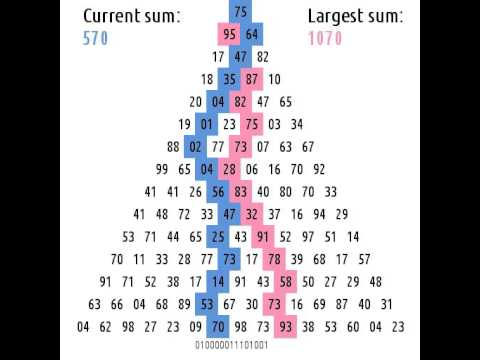

In [4]:
from IPython.display import YouTubeVideo

YouTubeVideo('z-AOWBztnpI', width=700, height=500)

# الحل
---


In [33]:
from pprint import pprint

def get_rows_from_file(file_path):
    file = open(file_path, 'r')
    rows = [line.strip().split(' ') for line in file.readlines()]
    file.close()
    return rows

def max_path_sum_in_file(file_path):
    all_rows = get_rows_from_file(file_path)

    # أول صف فوق
    # لازم نحوله لرقم لانه تم قرأته من الملف على هيئة نص
    # list وكمان نخليه داخل 
    # عشان تبقى الفاعدة عامة فى حالة وجود اكتر من اب 
    rows_sum = [int(all_rows[0][0])]
#     pprint(rows)

    for row in all_rows[1:]: # ابدأ من الصف الثانى
        current_row_sum = [] # 
        for indx, number in enumerate(row):
            # [-لأن الاباء سيكونوا من  [1:1
            # وهذا خطأ
            if indx == 0: 
                current_row_sum.append(int(number) + rows_sum[indx])
        
            else:
                parents = rows_sum[indx-1: indx + 1]
                # لابد من أخذ اكبر الاباء اذا وجد اكتر من اب 
                # لالغاء المسار ذو المجموع القليل
                current_row_sum.append(int(number) + max(parents))

        
        rows_sum = current_row_sum
    #     print(rows_sum)


    print(max(rows_sum))

In [34]:
%time max_path_sum_in_file('./triangle.txt')

1074
CPU times: user 792 µs, sys: 46 µs, total: 838 µs
Wall time: 547 µs
